## Explore the temporal relationships with `line`, `scatter`, and `autocorrelation` plots.

In [37]:
import pandas as pd
from pandas import read_csv
from pandas import DataFrame
from pandas import Grouper
from pandas import concat
from pandas.plotting import lag_plot
from pandas.plotting import scatter_matrix
from pandas.plotting import autocorrelation_plot
from matplotlib import pyplot 

In [17]:
print(pd.__version__)

1.5.3


In [1]:
series = read_csv(r'Daily_Min_Temp.csv' , header = 0 , index_col = 0 , parse_dates = True ).squeeze()

NameError: name 'read_csv' is not defined

In [19]:
series

Date
1981-01-01    20.7
1981-01-02    17.9
1981-01-03    18.8
1981-01-04    14.6
1981-01-05    15.8
              ... 
1990-12-27    14.0
1990-12-28    13.6
1990-12-29    13.5
1990-12-30    15.7
1990-12-31    13.0
Name: Temp, Length: 3650, dtype: float64

In [20]:
series.head()

Date
1981-01-01    20.7
1981-01-02    17.9
1981-01-03    18.8
1981-01-04    14.6
1981-01-05    15.8
Name: Temp, dtype: float64

In [21]:
type(series)

pandas.core.series.Series

### Time Series `Line Plot`

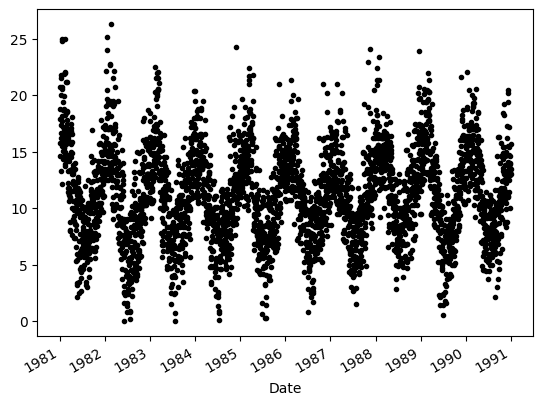

In [22]:
series.plot(style = 'k.')
pyplot.show()

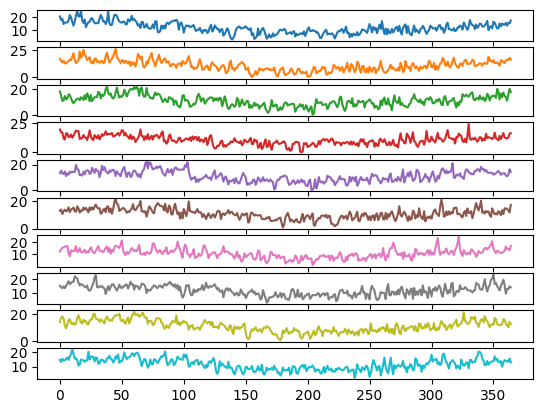

In [23]:
groups = series.groupby(Grouper(freq='A'))
years = DataFrame()
for name, group in groups:
    years[name.year] = group.values
years.plot(subplots=True, legend=False)
pyplot.show()

### Time Series `Histogram` and `Density Plots`

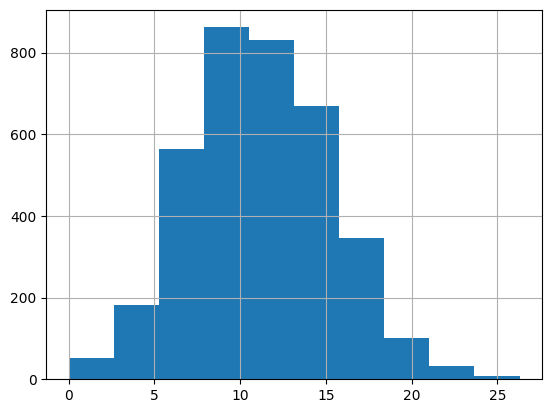

In [24]:
series.hist()
pyplot.show()

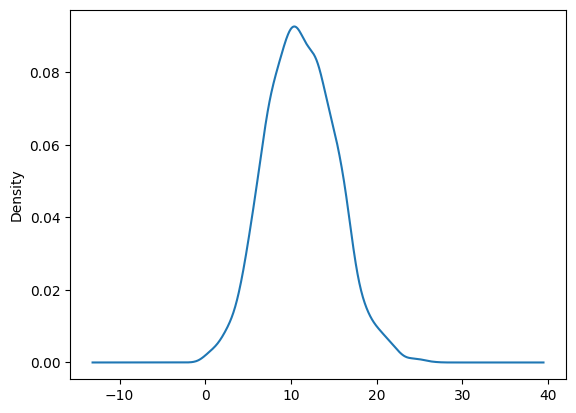

In [25]:
series.plot(kind='kde')
pyplot.show()

### Time Series `Box and Whisker` Plots by Interval

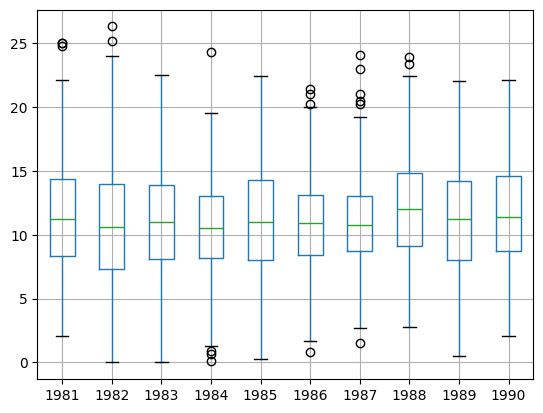

In [26]:
groups = series.groupby(Grouper(freq='A'))
years = DataFrame()
for name, group in groups:
    years[name.year] = group.values
years.boxplot()
pyplot.show()

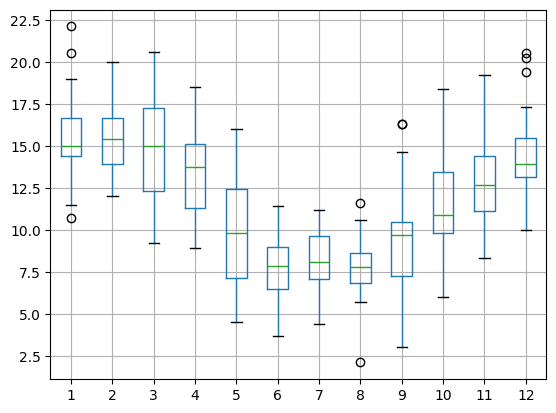

In [27]:
one_year = series['1990']
groups = one_year.groupby(Grouper(freq='M'))
months = concat([DataFrame(x[1].values) for x in groups], axis=1)
months = DataFrame(months)
months.columns = range(1,13)
months.boxplot()
pyplot.show()

### Time Series `Heat Maps`

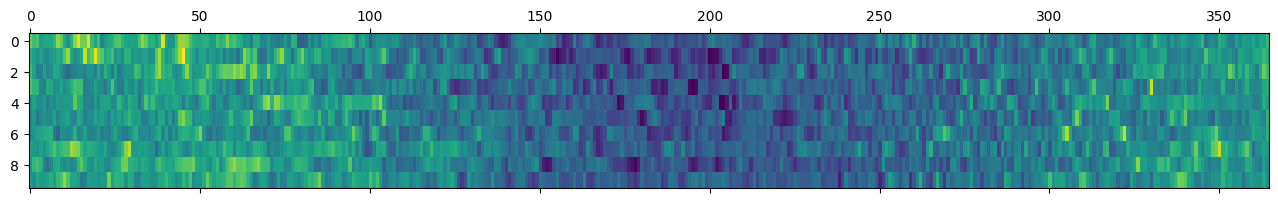

In [28]:
groups = series.groupby(Grouper(freq='A'))
years = DataFrame()
for name, group in groups:
    years[name.year] = group.values
years = years.T
pyplot.matshow(years, interpolation=None, aspect='auto')
pyplot.show()

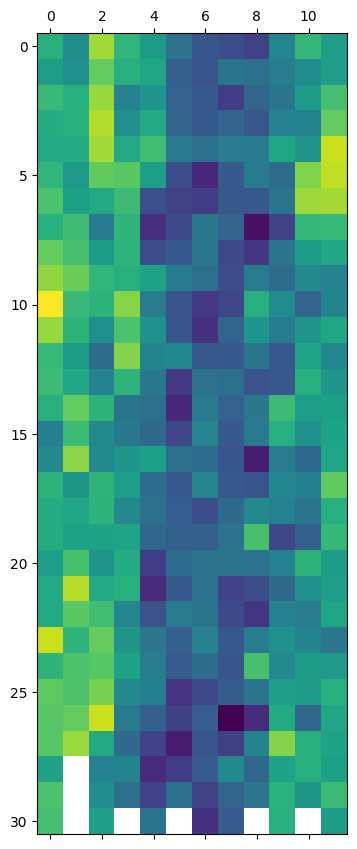

In [29]:
one_year = series['1990']
groups = one_year.groupby(Grouper(freq='M'))
months = concat([DataFrame(x[1].values) for x in groups], axis=1)
months = DataFrame(months)
months.columns = range(1,13)
pyplot.matshow(months, interpolation=None, aspect='auto')
pyplot.show()

### Time Series `Lag Scatter` Plots

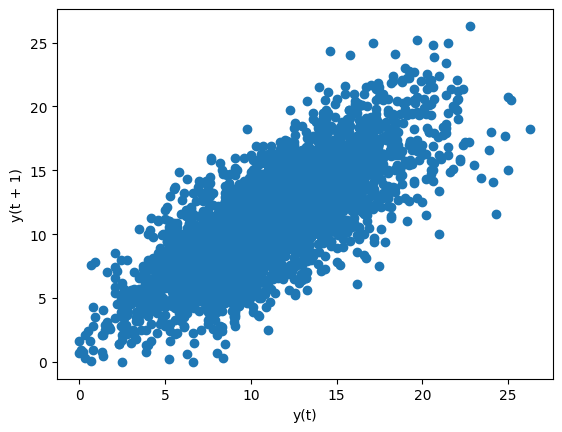

In [32]:
lag_plot(series)
pyplot.show()

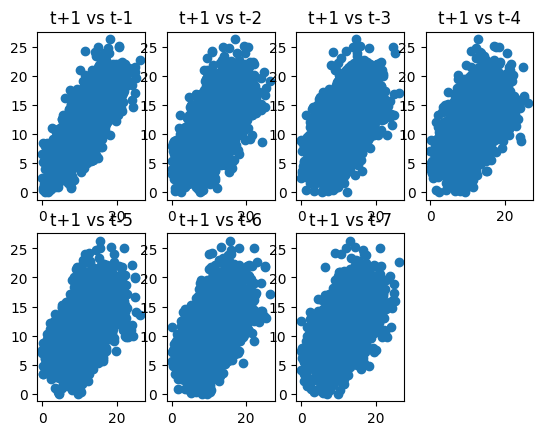

In [36]:
values = DataFrame(series.values)
lags = 7
columns = [values]

for i in range(1,(lags + 1)):
    columns.append(values.shift(i))
dataframe = concat(columns, axis=1)
columns = ['t+1']

for i in range(1,(lags + 1)):
    columns.append('t-' + str(i))
dataframe.columns = columns
pyplot.figure(1)

for i in range(1,(lags + 1)):
    ax = pyplot.subplot(240 + i)
    ax.set_title('t+1 vs t-' + str(i))
    pyplot.scatter(x=dataframe['t+1'].values, y=dataframe['t-'+str(i)].values)
pyplot.show()

### Time Series `Autocorrelation` Plots

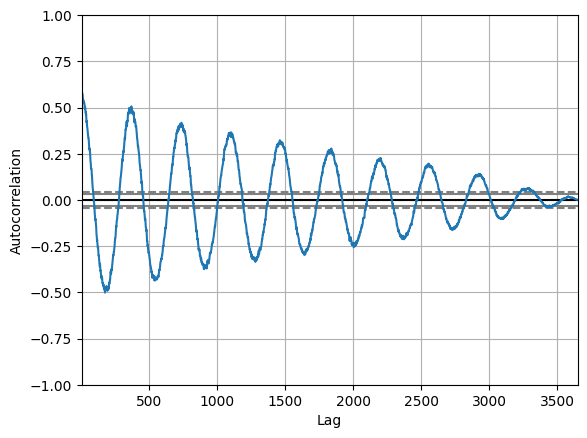

In [38]:
autocorrelation_plot(series)
pyplot.show()